#Uploading dataset to Google Colab

In [2]:
from google.colab import files
files.upload()

Saving housepricedata.csv to housepricedata.csv


{'housepricedata.csv': n'}

#Importing libraries we need

In [14]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


#Reading and showing data

In [7]:
data=pd.read_csv("/content/housepricedata.csv")
data

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


#Converting dataset into an array

In [8]:
dataset=data.values

In [9]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

#Normalizing data

In [10]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [12]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [13]:
X_scale


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

#Splitting data

In [15]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [16]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [17]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


#Model 1

In [18]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [19]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6942 - accuracy: 0.4249 - val_loss: 0.6902 - val_accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6864 - accuracy: 0.4958 - val_loss: 0.6841 - val_accuracy: 0.4795
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5152 - val_loss: 0.6789 - val_accuracy: 0.4795
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.5124 - val_loss: 0.6739 - val_accuracy: 0.4932
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.5273 - val_loss: 0.6692 - val_accuracy: 0.5068
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.5593 - val_loss: 0.6643 - val_accuracy: 0.5616
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6581 - accuracy: 0.5896 - val_loss: 0.6595 - val_accuracy: 0.6073
Epoch 8/100


In [20]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.9224


0.922374427318573

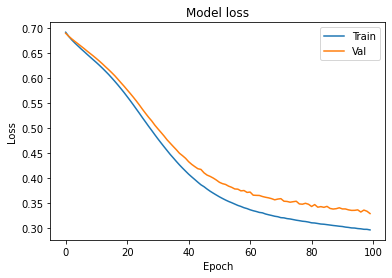

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

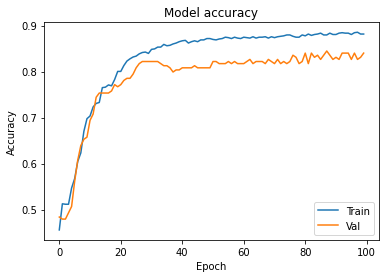

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Model 2: Adding Regularization to our Neural Network
We will notice that by doing this it will badly overfit our model so in the next model we will try to reduce it.

In [27]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [28]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 44ms/step - loss: 0.5244 - accuracy: 0.7114 - val_loss: 0.3995 - val_accuracy: 0.8082
Epoch 2/100
32/32 [==============================] - 1s 40ms/step - loss: 0.3522 - accuracy: 0.8487 - val_loss: 0.3904 - val_accuracy: 0.8174
Epoch 3/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3112 - accuracy: 0.8707 - val_loss: 0.2792 - val_accuracy: 0.8676
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2987 - accuracy: 0.8826 - val_loss: 0.2739 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2837 - accuracy: 0.8817 - val_loss: 0.2767 - val_accuracy: 0.8447
Epoch 6/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2583 - accuracy: 0.8935 - val_loss: 0.3312 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2749 - accuracy: 0.8965 - val_loss: 0.2920 - val_accuracy: 0.8493
Epoch 

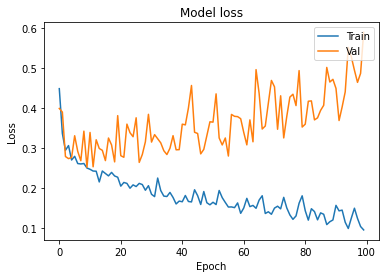

In [30]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

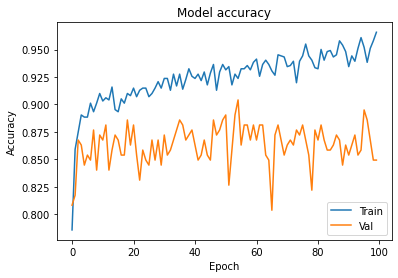

In [32]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Clear case of overfitting :(

#Model 3: reducing overfitting

In [33]:
from keras.layers import Dropout
from keras import regularizers
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [34]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 54ms/step - loss: 21.0987 - accuracy: 0.5438 - val_loss: 3.9328 - val_accuracy: 0.8037
Epoch 2/100
32/32 [==============================] - 2s 47ms/step - loss: 2.4955 - accuracy: 0.8564 - val_loss: 0.6787 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5988 - accuracy: 0.8514 - val_loss: 0.5418 - val_accuracy: 0.8219
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4977 - accuracy: 0.8760 - val_loss: 0.5065 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4908 - accuracy: 0.8849 - val_loss: 0.5596 - val_accuracy: 0.8174
Epoch 6/100
32/32 [==============================] - 1s 47ms/step - loss: 0.5038 - accuracy: 0.8578 - val_loss: 0.5278 - val_accuracy: 0.8402
Epoch 7/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4764 - accuracy: 0.8775 - val_loss: 0.5282 - val_accuracy: 0.8311
Epoch

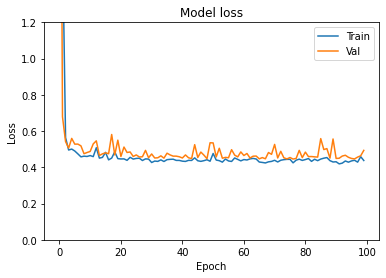

In [35]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

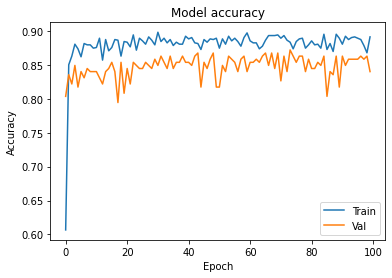

In [37]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

This task was a little bit rushed because I'm currently busy with studying for exams but It was simple and more straight-forward than the other tasks I completed.